## We finna wrangle

In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary Zillow data from the zillow database in the Codeup database server.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import mason_functions as mf

In [2]:
def get_db_url(db_name):
    from env import host, user, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

### Exercise I
Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.

In [3]:
#define my sql query into the relational database
sql = '''
SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
FROM properties_2017
WHERE propertylandusetypeid = 261 or propertylandusetypeid = 279
'''

#define my url
url = get_db_url('zillow')

#read the information from the db into a df
#I also don't want to keep querying the codeup rdbms (in case the kernel gotta go)
if os.path.isfile('properties_2017.csv'):
    df = pd.read_csv('properties_2017.csv', index_col = 0)
else:
    df = pd.read_sql(sql, url)
    df.to_csv('properties_2017.csv')

In [4]:
#at a glance
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152864 entries, 0 to 2152863
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 131.4 MB
None


,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


### Exercise II
Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaninful; remember to document your process and decisions using markdown and code commenting where helpful.

In [5]:
#summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152853.0,3.287195,0.954757,0.00,3.0000,3.000,4.0000,25.00
bathroomcnt,2152853.0,2.230687,0.999281,0.00,2.0000,2.000,3.0000,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.0000,1623.000,2208.0000,952576.00
taxvaluedollarcnt,2152371.0,461896.052361,699675.940049,1.00,188170.0000,327671.000,534527.0000,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.0000,1958.000,1976.0000,2016.00
taxamount,2148422.0,5634.863752,8178.908996,1.85,2534.9725,4108.945,6414.3175,1337755.86
fips,2152864.0,6048.377330,20.433289,6037.00,6037.0000,6037.000,6059.0000,6111.00


In [6]:
df = df.rename(columns = {'bedroomcnt': 'bedroom_count',
                         'bathroomcnt': 'bathroom_count',
                         'calculatedfinishedsquarefeet': 'square_footage',
                         'taxvaluedollarcnt': 'tax_value',
                         'yearbuilt': 'year_built',
                         'taxamount': 'taxes',
                         'fips': 'fips_id'
                         })

In [7]:
df.fips_id = df.fips_id.astype(int)

In [8]:
quant_vars = ['bedroom_count', 'bathroom_count', 'square_footage', 'tax_value', 'taxes']

      bedroom_count bathroom_count square_footage    tax_value   year_built  \
count   2.15285e+06    2.15285e+06    2.14438e+06  2.15237e+06  2.14353e+06   
mean        3.28719        2.23069        1862.86       461896      1960.95   
std        0.954757       0.999281        1222.13       699676      22.1622   
min               0              0              1            1         1801   
25%               3              2           1257       188170         1949   
50%               3              2           1623       327671         1958   
75%               4              3           2208       534527         1976   
max              25             32         952576  9.84289e+07         2016   

             taxes      fips_id  
count  2.14842e+06  2.15286e+06  
mean       5634.86      6048.38  
std        8178.91      20.4333  
min           1.85         6037  
25%        2534.97         6037  
50%        4108.94         6037  
75%        6414.32         6059  
max    1.33776e+

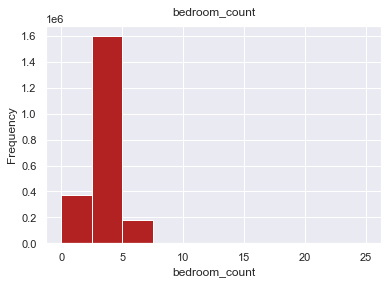

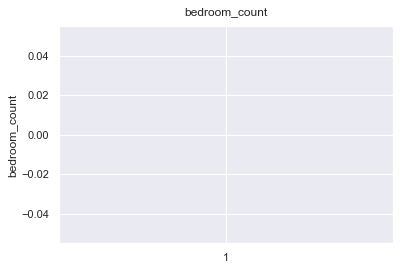

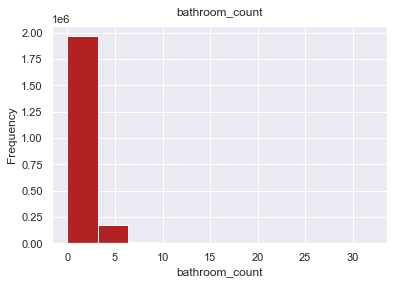

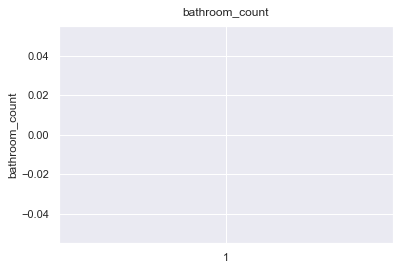

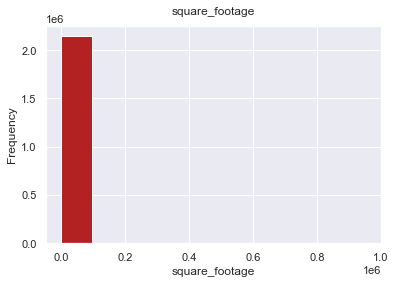

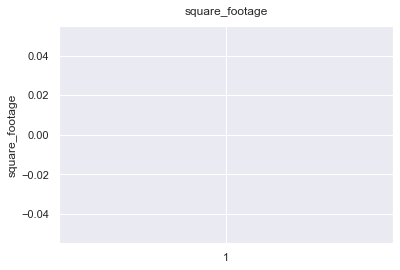

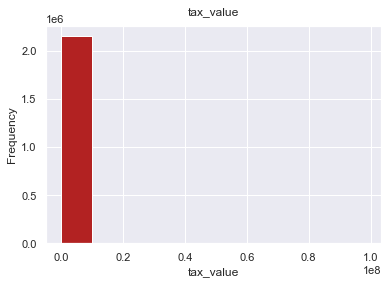

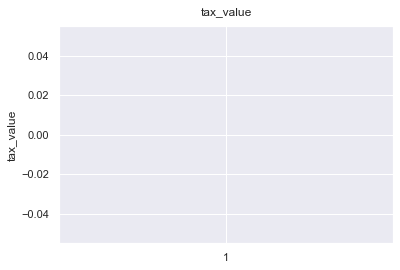

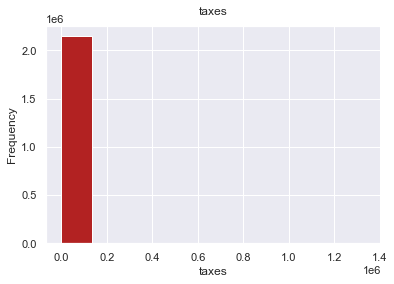

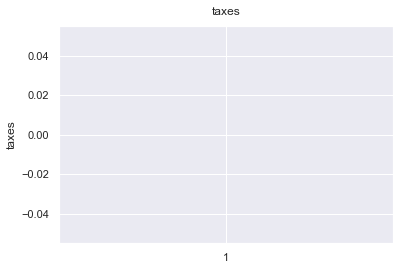

<Figure size 432x288 with 0 Axes>

In [9]:
#distributions
print(df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))))
sns.set()
for cat in quant_vars:
    df[cat].hist(color = 'firebrick')
    plt.title(cat, pad = 11)
    plt.xlabel(cat)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show();
    plt.boxplot(df[cat])
    plt.title(cat, pad = 11)
    plt.ylabel(cat)
    plt.grid(True)
    plt.show()
    plt.tight_layout();

Okay, there are way too many outliers.

In [10]:
#remove outliers
def remove_outliers(df, k, col_list):
    ''' 
    Removes outliers from a list of columns in a dataframe and returns the dataframe.
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [11]:
#remove outliers
df = remove_outliers(df, 1.3, quant_vars)

In [12]:
#how many rows do I have now?
mf.add_commas(len(df))

'1,809,980'

In [13]:
#more perspective
df.sample(10)

,bedroom_count,bathroom_count,square_footage,tax_value,year_built,taxes,fips_id
1751629,4.0,3.0,3214.0,448725.0,1987.0,5607.24,6037
20128,3.0,2.0,1085.0,468625.0,1994.0,5753.78,6059
70048,3.0,2.0,1753.0,567000.0,1939.0,6679.96,6037
826936,3.0,2.0,1691.0,354592.0,1978.0,4104.70,6059
2145467,3.0,2.0,1974.0,321574.0,1950.0,4368.18,6037
1864678,3.0,2.0,1524.0,153753.0,1988.0,2845.48,6037
1094249,4.0,3.0,1752.0,469096.0,1961.0,5816.18,6037
1546528,3.0,2.0,1628.0,97158.0,1962.0,1443.49,6037
2050426,4.0,2.0,1660.0,230853.0,1940.0,2882.28,6037
566193,2.0,1.0,744.0,125030.0,1950.0,1805.90,6037


      bedroom_count bathroom_count square_footage    tax_value   year_built  \
count   1.80998e+06    1.80998e+06    1.80998e+06  1.80998e+06  1.80913e+06   
mean         3.2029        2.03454        1630.97       317629      1959.15   
std        0.776449       0.696335        541.351       187996      20.3478   
min               2              1            132           22         1801   
25%               3              2           1225       170385         1949   
50%               3              2           1534       290967         1957   
75%               4            2.5           1957       440328         1972   
max               5              4           3237       877258         2016   

             taxes      fips_id  
count  1.80998e+06  1.80998e+06  
mean       3948.42      6048.32  
std        2112.59      20.5648  
min          16.48         6037  
25%        2327.67         6037  
50%        3681.61         6037  
75%         5349.2         6059  
max        9513.

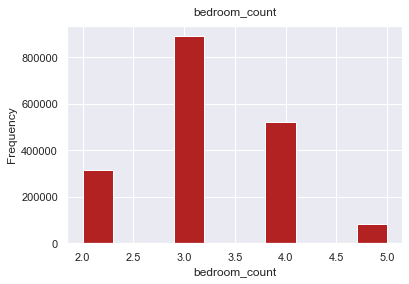

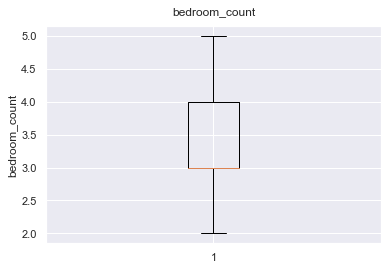

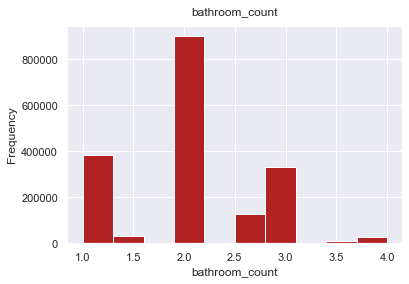

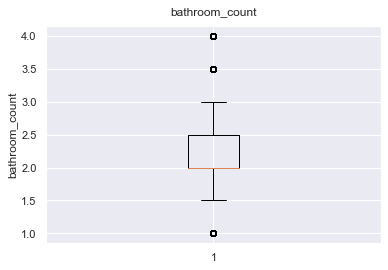

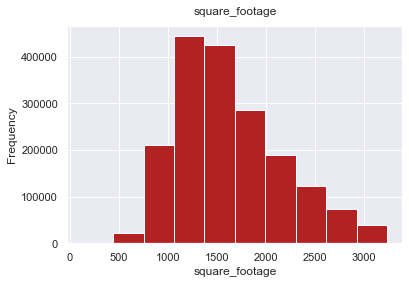

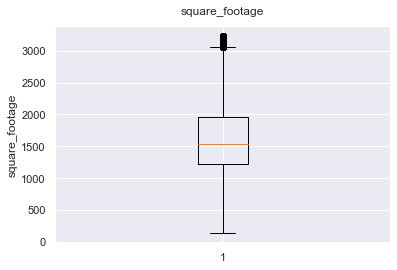

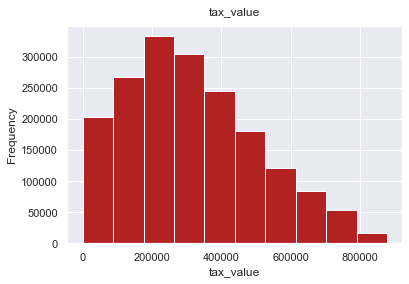

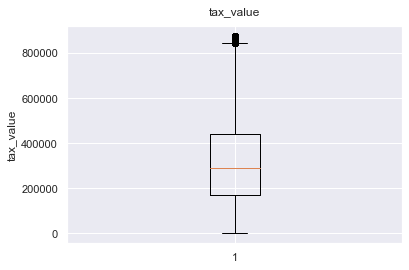

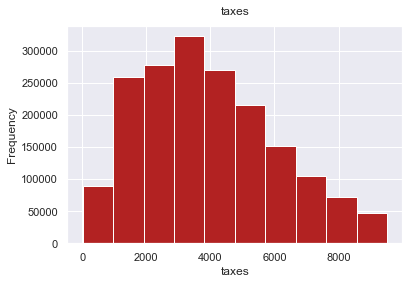

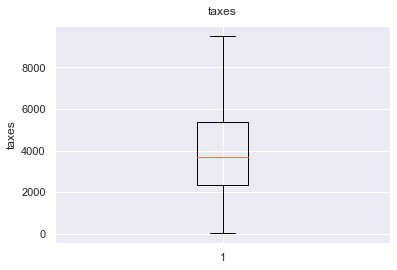

<Figure size 432x288 with 0 Axes>

In [14]:
#distributions post outlier removal
print(df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))))
sns.set()
for cat in quant_vars:
    df[cat].hist(color = 'firebrick')
    plt.title(cat, pad = 11)
    plt.xlabel(cat)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show();
    plt.boxplot(df[cat])
    plt.title(cat, pad = 11)
    plt.ylabel(cat)
    plt.grid(True)
    plt.show()
    plt.tight_layout();

In [15]:
#how many outliers for my target variable
mf.add_commas(len(df[df.tax_value > 850_000]))

'2,272'

In [16]:
#how many left?
mf.add_commas(len(df))

'1,809,980'

In [17]:
#what kind of nulls am I looking at here?
df.isnull().any()

bedroom_count     False
bathroom_count    False
square_footage    False
tax_value         False
year_built         True
taxes             False
fips_id           False
dtype: bool

In [18]:
#sum of nulls by column
df.isnull().sum()

bedroom_count       0
bathroom_count      0
square_footage      0
tax_value           0
year_built        846
taxes               0
fips_id             0
dtype: int64

In [19]:
#list the columns with null values
df.columns[df.isnull().any()]

Index(['year_built'], dtype='object')

In [20]:
#I can afford to drop 900 rows in a dataset with over a million records
df = df[df.year_built.notnull()]

In [21]:
#verify correctly done
df.year_built.isnull().any()

False

In [22]:
#reformat existing values to reduce noise when looking at the dataframe
df.square_footage = df.square_footage.astype(int)
df.year_built = df.year_built.astype(int)

In [23]:
df.head()

,bedroom_count,bathroom_count,square_footage,tax_value,year_built,taxes,fips_id
7,3.0,2.0,2077,646760.0,1926,7924.68,6037
18,3.0,1.0,1244,169471.0,1950,2532.88,6037
19,3.0,2.0,1300,233266.0,1950,3110.99,6037
20,3.0,2.0,1222,290492.0,1951,3870.25,6037
23,3.0,2.5,1821,537949.0,2013,6173.72,6059


In [24]:
#establish ratio between tax value dollar count and tax amount for all rows
df['tax_ratio'] = df.tax_value / df.taxes

In [25]:
#get a feel for this new feature
df.tax_ratio.describe().T

count    1.809134e+06
mean     7.884113e+01
std      5.107850e+01
min      3.219043e-03
25%      7.276854e+01
50%      8.003194e+01
75%      8.422899e+01
max      2.794460e+04
Name: tax_ratio, dtype: float64

In [26]:
#no. of observations at this point in time
mf.add_commas(len(df))

'1,809,134'

In [27]:
df.fips_id.value_counts()
#6037 = Los Angeles County
#6059 = Orange County
#6111 = Ventura County
#all zillow single family residential properties in California? 

6037    1214251
6059     453351
6111     141532
Name: fips_id, dtype: int64

In [28]:
los_angeles_county = df[df.fips_id == 6037]
orange_county = df[df.fips_id == 6059]
ventura_county = df[df.fips_id == 6111]

In [29]:
los_angeles_county.tax_value.describe()

count    1.214251e+06
mean     2.938252e+05
std      1.780512e+05
min      2.200000e+01
25%      1.557340e+05
50%      2.638560e+05
75%      4.051970e+05
max      8.767450e+05
Name: tax_value, dtype: float64

In [30]:
orange_county.tax_value.describe()

count    453351.000000
mean     369940.858529
std      201108.472357
min        2080.000000
25%      218503.000000
50%      353867.000000
75%      511137.000000
max      877230.000000
Name: tax_value, dtype: float64

In [31]:
ventura_county.tax_value.describe()

count    141532.000000
mean     354587.631751
std      187725.453109
min        4544.000000
25%      219529.000000
50%      341747.500000
75%      480780.000000
max      877258.000000
Name: tax_value, dtype: float64

In [32]:
df.head()

,bedroom_count,bathroom_count,square_footage,tax_value,year_built,taxes,fips_id,tax_ratio
7,3.0,2.0,2077,646760.0,1926,7924.68,6037,81.613390
18,3.0,1.0,1244,169471.0,1950,2532.88,6037,66.908420
19,3.0,2.0,1300,233266.0,1950,3110.99,6037,74.981276
20,3.0,2.0,1222,290492.0,1951,3870.25,6037,75.057684
23,3.0,2.5,1821,537949.0,2013,6173.72,6059,87.135309


In [33]:
#let's get dummies
dummy_df = pd.get_dummies(df['fips_id'], dummy_na = False, drop_first = False)

In [34]:
dummy_df.head()

,6037,6059,6111
7,1,0,0
18,1,0,0
19,1,0,0
20,1,0,0
23,0,1,0


In [35]:
dummy_df = dummy_df.rename(columns = {6037: 'LA_county',
                                      6059: 'orange_county',
                                      6111: 'ventura_county'
                                     })

In [36]:
df = pd.concat([df, dummy_df], axis = 1)

In [37]:
df.head()

,bedroom_count,bathroom_count,square_footage,tax_value,year_built,taxes,fips_id,tax_ratio,LA_county,orange_county,ventura_county
7,3.0,2.0,2077,646760.0,1926,7924.68,6037,81.613390,1,0,0
18,3.0,1.0,1244,169471.0,1950,2532.88,6037,66.908420,1,0,0
19,3.0,2.0,1300,233266.0,1950,3110.99,6037,74.981276,1,0,0
20,3.0,2.0,1222,290492.0,1951,3870.25,6037,75.057684,1,0,0
23,3.0,2.5,1821,537949.0,2013,6173.72,6059,87.135309,0,1,0


### Exercise III
Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe witn no missing values in your wrangle.py file. Name your final function wrangle_zillow.

In [38]:
import wrangle

In [39]:
#load pre-split data for univariate stats (distributions)
df = wrangle.prep_zillow()

In [40]:
#quick check
df.head()

,bedroom_count,bathroom_count,square_footage,tax_value,year_built,taxes,fips_id,tax_ratio,LA_county,orange_county,ventura_county
7,3.0,2.0,2077,646760.0,1926,7924.68,6037,81.613390,1,0,0
18,3.0,1.0,1244,169471.0,1950,2532.88,6037,66.908420,1,0,0
19,3.0,2.0,1300,233266.0,1950,3110.99,6037,74.981276,1,0,0
20,3.0,2.0,1222,290492.0,1951,3870.25,6037,75.057684,1,0,0
23,3.0,2.5,1821,537949.0,2013,6173.72,6059,87.135309,0,1,0


In [41]:
#wrangle
train, validate, test = wrangle.wrangle_zillow()

In [42]:
#verify split
train.shape, validate.shape, test.shape

((1013114, 11), (434193, 11), (361827, 11))

In [43]:
#looks clear
train.head()

,bedroom_count,bathroom_count,square_footage,tax_value,year_built,taxes,fips_id,tax_ratio,LA_county,orange_county,ventura_county
1402662,5.0,3.0,2178,221092.0,1940,3304.20,6037,66.912415,1,0,0
1226039,2.0,2.0,1145,422081.0,1957,5083.80,6059,83.024706,0,1,0
1678272,3.0,2.0,1441,297583.0,1977,3096.14,6059,96.114194,0,1,0
1309993,3.0,2.0,1205,64559.0,1956,1151.29,6037,56.075359,1,0,0
884898,3.0,3.0,2231,590253.0,1968,7227.85,6037,81.663704,1,0,0
